# Preparation

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

In [2]:
# fetch dataset
online_news_popularity = fetch_ucirepo(id=332)

# data
X = online_news_popularity.data.features
y = online_news_popularity.data.targets

# metadata
print(online_news_popularity.metadata)

# variable information
print(online_news_popularity.variables)

{'uci_id': 332, 'name': 'Online News Popularity', 'repository_url': 'https://archive.ics.uci.edu/dataset/332/online+news+popularity', 'data_url': 'https://archive.ics.uci.edu/static/public/332/data.csv', 'abstract': 'This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 39797, 'num_features': 58, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': [' shares'], 'index_col': ['url'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Thu Feb 15 2024', 'dataset_doi': '10.24432/C5NS3V', 'creators': ['Kelwin Fernandes', 'Pedro Vinagre', 'Paulo Cortez', 'Pedro Sernadela'], 'intro_paper': {'ID': 390, 'type': 'NATIVE', 'title': 'A Proactive Intelligent Decisio

# Preprocessing

In [ ]:
X = X.reset_index()
y = y.reset_index()

In [22]:
df = pd.merge(X, y, how='outer', on='index')
df = df.drop(columns=['level_0', 'index'])
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# Statistical Analysis

Question: How does the number of shares distribute?

Text(0.5, 1.0, 'Distribution of Article Shares (Log Scale)')

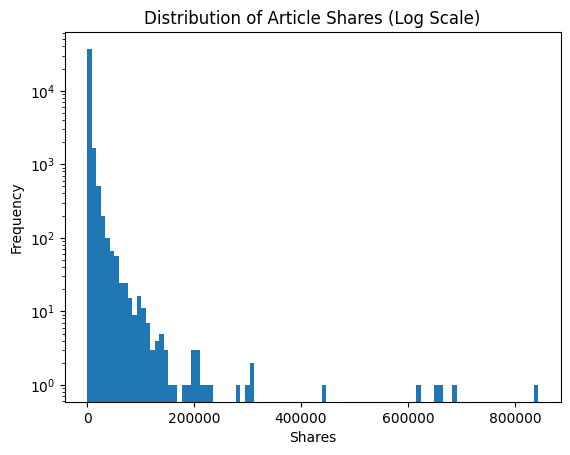

In [60]:
plt.hist(df[' shares'], bins=100)
plt.yscale("log")
plt.xlabel("Shares")
plt.ylabel("Frequency")
plt.title("Distribution of Article Shares (Log Scale)")

Question: Which type of channel (Lifestyle, Entertainment, Business, Social Media, Tech, or Word) does generate the highest shares?

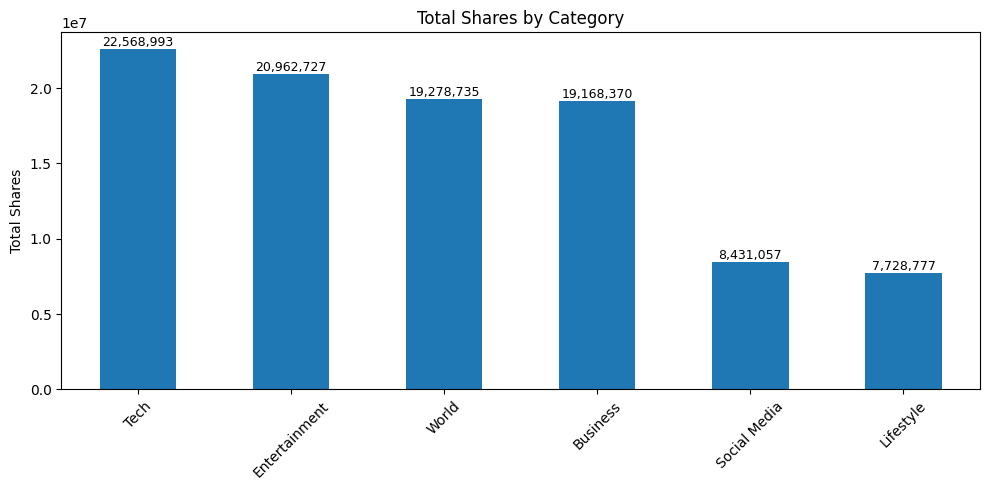

In [52]:
# Number of shares by categories
lifestyle_shares = df[df[' data_channel_is_lifestyle'] == 1][' shares'].sum()
entertainment_shares = df[df[' data_channel_is_entertainment'] == 1][' shares'].sum()
bus_shares = df[df[' data_channel_is_bus'] == 1][' shares'].sum()
socmed_shares = df[df[' data_channel_is_socmed'] == 1][' shares'].sum()
tech_shares = df[df[' data_channel_is_tech'] == 1][' shares'].sum()
world_shares = df[df[' data_channel_is_world'] == 1][' shares'].sum()

# Dataset
df_categories = pd.DataFrame()
df_categories = pd.DataFrame({
    'Category': ['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Tech', 'World'],
    'Shares': [lifestyle_shares, entertainment_shares, bus_shares, socmed_shares, tech_shares, world_shares]
})
df_categories

# Visualize
df_categories_sorted = df_categories.sort_values('Shares', ascending=False).reset_index(drop=True)

ax = df_categories_sorted.plot(
    kind='bar',
    x='Category',
    y='Shares',
    legend=False,
    color='C0',
    figsize=(10, 5)
)
ax.set_title('Total Shares by Category')
ax.set_ylabel('Total Shares')
ax.set_xlabel('')
ax.tick_params(axis='x', rotation=45)

# annotate bars with formatted numbers
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Question: Are there correlation between number of shares with number of images, number of videos, and number of words in the title?

Text(0.5, 1.0, 'Number of Shares vs. Number of Images')

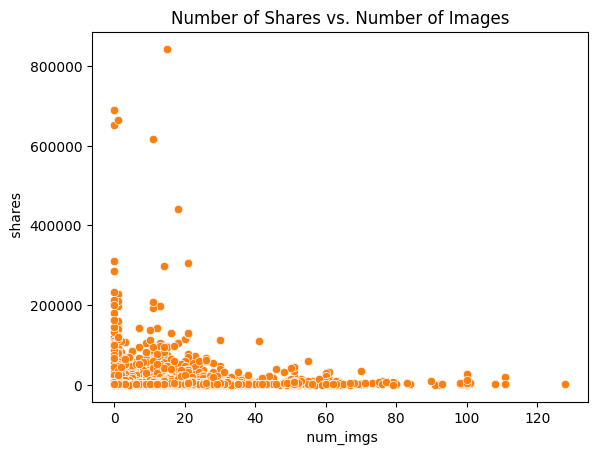

In [ ]:
fig, ax = plt.subplots()

ax = sns.scatterplot(
    data= df,
    x = df[' num_imgs'],
    y = df[' shares']
)
ax.set_title('Number of Shares vs. Number of Images')

Text(0.5, 1.0, 'Number of Shares vs. Number of Videos')

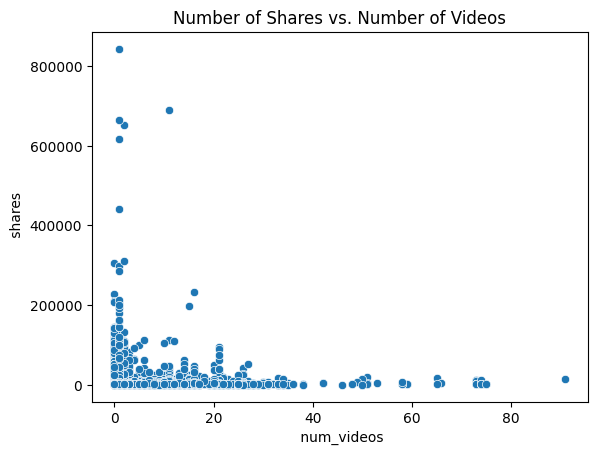

In [57]:
ax = sns.scatterplot(
    data= df,
    x = df[' num_videos'],
    y = df[' shares']
)
ax.set_title('Number of Shares vs. Number of Videos')

Text(0.5, 1.0, 'Number of Shares vs. Number of words in title')

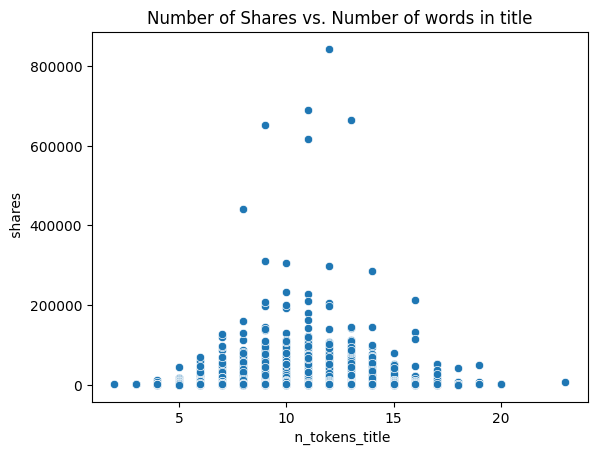

In [58]:
ax = sns.scatterplot(
    data= df,
    x = df[' n_tokens_title'],
    y = df[' shares']
)
ax.set_title('Number of Shares vs. Number of words in title')

# Key EDA Findings

1. The distribution of article shares is highly skewed,
   suggesting that unconstrained maximization may favor
   a small number of extreme articles.

2. Article topics are unevenly represented, motivating
   explicit diversity constraints in the LP formulation.

3. These observations justify modeling promotion decisions
   as a constrained optimization problem rather than
   simple ranking by predicted popularity.
